<a href="https://colab.research.google.com/github/rgw3wgs/DS-4002/blob/main/Project1_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: GSS

**Group 2: Randa Ampah, Neha Channamraju, Rebekah Weaver, Faith Koobial, Gian Baez, Aysha Hussen**

# Summary

For our project, we decided to use the GSS data to examine the relationship between the education, work hours, income, marital status, happiness, and political affiliations variables in an attempt to see how they changed over a four year span, more specifically, in the years 2006, 2008, and 2010. This question allows us to find any correlations between variables and see how they may affect one another, as well as allowing us to investigate reasons for potential changes in variables.

Rather than selecting the aforementioned variables at random, we thoughtfully decided which to include and exclude. One variable that didn’t make the cut, such as the race variable, wasn’t selected due to its lack of information. This variable only provided data on if someone was white, black, or other. Some other variables we omitted were class (class identification) and wrkstat (labor force status). These variables weren’t selected because we felt as though there wasn’t much for us to work with in terms of drawing conclusions and identifying relationships. The variables we decided to include all had sufficient information for us to analyze.


# Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

gss = pd.read_parquet("https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet")
gss = gss.dropna(how = "all")

filt = gss.filter(items = ["year", "occ" "wrkstat", "wrkslf", "hrs1", "income06",
                           "degree", "marital", "happy", "partyid"],axis=1)
yrgss = filt[(filt["year"] == 2006) | (filt["year"] == 2008) | (filt["year"] == 2010)]
yrgss

,year,wrkslf,hrs1,income06,degree,marital,happy,partyid
0,2006,someone else,40.0,$110000 to $129999,high school,married,NaN,"independent (neither, no response)"
1,2006,someone else,NaN,$75000 to $89999,bachelor's,never married,pretty happy,"independent (neither, no response)"
2,2006,someone else,35.0,$60000 to 74999,bachelor's,divorced,pretty happy,not very strong republican
3,2006,someone else,50.0,$35000 to 39999,high school,never married,NaN,not very strong republican
4,2006,someone else,40.0,$75000 to $89999,bachelor's,married,very happy,not very strong republican
...,...,...,...,...,...,...,...,...
6822,2010,someone else,NaN,$150000 or over,bachelor's,married,pretty happy,strong republican
6823,2010,someone else,NaN,$12500 to 14999,high school,widowed,not too happy,strong republican
6824,2010,someone else,40.0,$20000 to 22499,high school,separated,very happy,not very strong democrat
6825,2010,someone else,49.0,$6 000 to 6 999,bachelor's,divorced,pretty happy,"independent (neither, no response)"


Key variables that were used were income, degree, marital status, hours worked, happiness, political party affiliation, and if they work for themselves or someone else. Furthermore, we filtered these results to look at years 2006, 2008, and 2010. We did this because the income variables were split by chunks of year and chose these specific ones because we thought it would be interesting to monitor before, during, and after the recession.

Some complications that were faced were that the number of Nas had to do with the variables we chose because sometimes there would be too many Nas in a row. When exploring the happiness data for plotting, we found out that it was a category variable instead of a string variable. It also had many more unique value options than were chosen by the people who took the survey. The problem was solved by converting the happy variable to a string, which led to the unique values being limited to 4 (very happy, pretty happy, not so happy, and NaN). Upon further exploration, we found this to be the case with all of our categorical variables and applied the same remedy to those variables as well.
The correlation between all these variables and why we chose to use them in relation to one another because your degree and income level is often related to one another. People often associate income with happiness. There were other variables that we considered using but didn't, like class, because it would have been somewhat repetitive because we already included income level.

# Results

<Axes: xlabel='hrs1', ylabel='Density'>

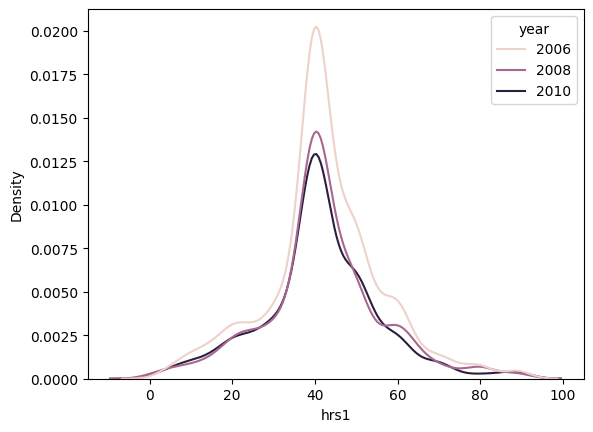

In [ ]:
sns.kdeplot(data=yrgss,x="hrs1", hue = "year")

Peaks [0.012916845898429175, 0.014214509271518407, 0.02023625068111495]


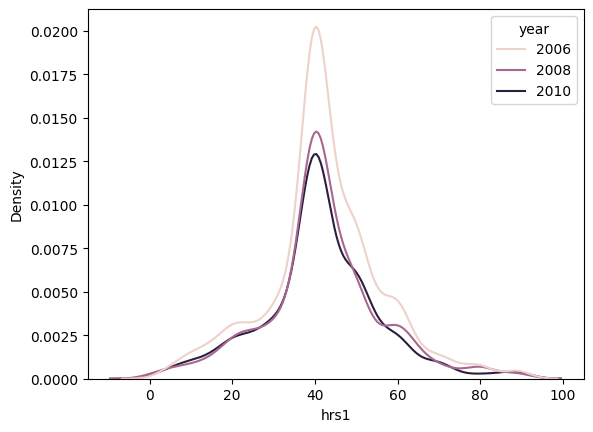

In [ ]:
peak_density = []
for line in sns.kdeplot(data=yrgss, x="hrs1", hue="year").get_lines():
    peak_density.append(np.max(line.get_ydata()))

print("Peaks", peak_density)

In [ ]:
yrgss.groupby('year')['hrs1'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2006,1662.0,42.336342,14.213623,3.0,38.0,40.0,50.0,89.0
2008,1203.0,42.003325,14.479890,1.0,37.0,40.0,50.0,89.0
2010,1139.0,41.363477,14.394563,1.0,35.0,40.0,50.0,89.0


The KDE plot tracking hours worked from 2006 to 2010 reveals drastic reduction in density, notably during the 2008 recession with a 29.73% decrease in density from 2006 to 2008, but approximately a 9.12% decrease from 2008 to 2010. Initially, the recession caused a sharp drop in hours worked, indicating significant changes in employment. The plot line from 2008 and 2010 showed less variability, suggesting that the pattern of hours worked became more stable as economic changes had a diminished impact on workforce behavior.

This stability is further shown by our statistical findings in the Appendix, showing a slight decrease in mean hours worked over the years, while the median hours remained constant at 40.0 across the years. Lastly, the consistent dispersion around the mean indicated by the standard deviation of hours worked reinforces consistency amidst economic flux.  


<ipython-input-2-6b11da725b6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrgss['partyid'] = yrgss['partyid'].astype(str)


<Axes: xlabel='partyid', ylabel='income06'>

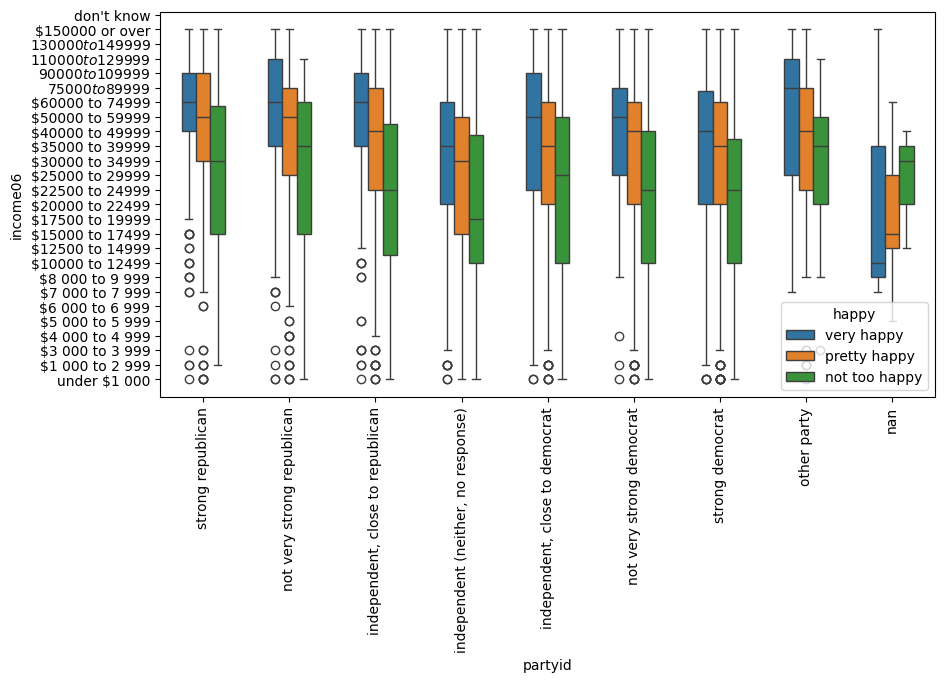

In [ ]:
yrgss['partyid'] = yrgss['partyid'].astype(str)
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

plot = sns.boxplot(yrgss, x = 'partyid', y = 'income06', order = ['strong republican', 'not very strong republican', 'independent, close to republican', 'independent (neither, no response)', 'independent, close to democrat', 'not very strong democrat', 'strong democrat', 'other party', np.nan], width = 0.5, hue = 'happy', hue_order = ['very happy', 'pretty happy', 'not too happy'], ax=ax)
plt.setp(plot.get_xticklabels(), rotation=90)
plot.invert_yaxis()

plot

# Conclusion

Our project aimed to explore the dynamics between socio-economic variables and political affiliations using the General Social Survey (GSS) data from 2006 to 2010. Through thoughtful selection and analysis of key variables such as education, work hours, income, marital status, happiness, and political affiliation, we wanted to understand how these factors changed over time and how they related to each other.We chose to focus on the years 2006, 2008, and 2010; aligning with significant events such as the 2008 recession and the subsequent economic recovery. By examining data from these specific years, we aimed to capture the impact of these events on socio-economic variables and political affiliations.

The KDE plot tracking hours worked over time highlighted a drastic reduction in density during the 2008 recession, suggesting significant changes in employment patterns. The stability observed post-recession indicated resilience within the workforce. Also, while higer incomes generally correlated with greater happiness across political affiliations there is some variablitiy as well.

One of the primary criticisms we anticipate is the exclusion of certain variables like race and labor force status. While these variables are important in socio-economic analyses, our decision to exclude them was based on their limited information and potential overlap with other variables. Also, some may critique our focus on a specific timeframe, arguing that it might not capture long-term trends adequately. However, we believe that the selected years offer a valuable snapshot of socio-economic changes, especially concerning the impact of the 2008 recession. By examining data before, during, and after the recession, we can assess how economic downturns influence our variables.
Some areas for further exploration include expanding the analysis to include data from additional years to examine long-term trends in socio-economic variables. This could provide a more comprehensive understanding of societal changes over time. We could also extend our project to incorporate certain variables like race. We could also incorporate external events or policy changes, such as legislative reforms or political events, to assess their impact on socio-economic dynamics. Understanding how external factors influence variables like income, education, and happiness could be interesting to see.


